# Initial Condition Sensitivity Analysis
Analyze the sensitivity of the filament dynamics to Initial Conditions.

Procedure:
- Start with a simulation after transients are over.
- Choose random points corresponding to different phase and time values. 
- For each point choose O(100) nearby points by adding a random perturbation to the filament shape.
- Simulate the dynamics of these IC over a further N cycles.
- For each pair of closely separated IC, calculate the pair-wise Euclidean distance between the filament shapes.
- Plot the change in this pair-wise distance over time and average over all ICs (closely separed). Also average over many different ICs

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
from sys import platform

import pyfilaments.analysisutils as analysis
from pyfilaments.activeFilaments import activeFilament

import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

# Check which platform
if platform == "linux" or platform == "linux2":
    print("linux system")
    # root_path = '/home/deepak/Dropbox/LacryModeling/ModellingResults'
    root_path = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults'

elif platform == 'darwin':
    print("OSX system")
    root_path = '/Users/deepak/Dropbox/LacryModeling/ModellingResults'

dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', 're', 'enum', 

## Load a filament simuation where transients have decayed

In [15]:
folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point'
file = 'SimResults_00.hdf5'
# fil = 
fil = analysis.analysisTools(file = os.path.join(folder, file))



3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point
Data file SimResults_00.hdf5


<IPython.core.display.Javascript object>


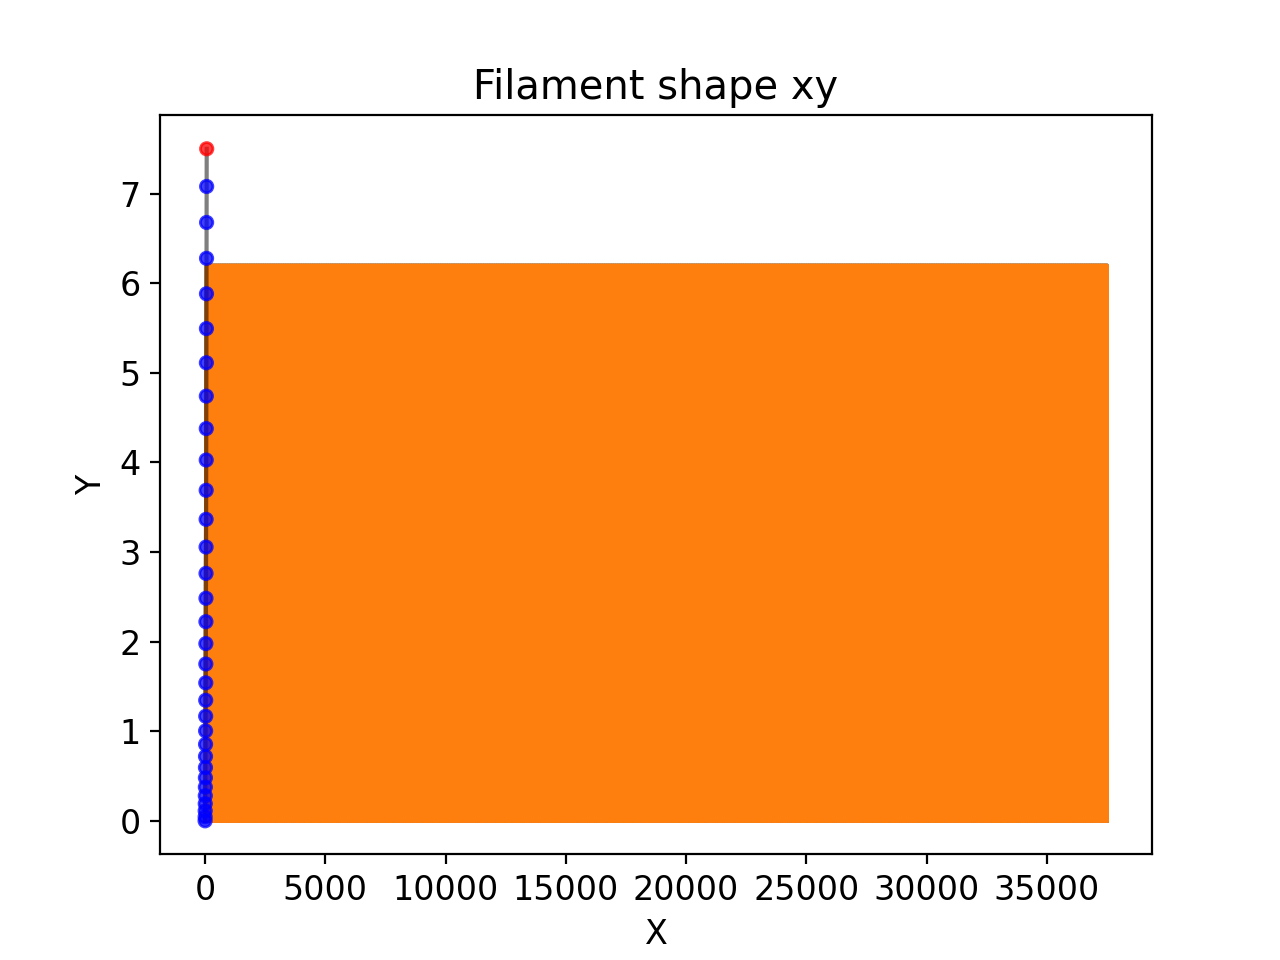

In [16]:
final_shape = fil.R[-1,:]
plt.figure()
fil.plotFilament(r = final_shape)

## Choose ICs after transients have decayed

In [35]:
import random

N_cycles = int(fil.Time[-1]/fil.activity_timescale)
N_transient = 100 # No:of activity cycles for transients to decay. 

N_IC_time = 10 # IC based on different activity cycles/time
N_IC_phase = 10 # Different IC within each activity phase

N_IC_nearby = 1000

delta_IC = 1e-12 # Average distance between nearby ICs.

# Choose n random activity cycles (time)
n_cycles = random.sample(range(N_transient, N_cycles), N_IC_time)

print(n_cycles)

# Within each activity cycle choose points evenly distributed in phase
n_phase = random.sample(list(np.linspace(0, 2*np.pi, 100)), N_IC_phase)

print(n_phase)

# Compute the minimum resolved phase difference in the simulations
delta_phase = 2*np.pi*np.mean(fil.Time[1:] - fil.Time[:-1])/fil.activity_timescale # Smallest change in phase

time_points = np.array(range(0, len(fil.Time)))
# Find the index corresponding to each unique IC

# Create empty array to store indices for each unique IC

ic_mesh = np.empty((N_IC_time, N_IC_phase), dtype = int)

for ii, phase in enumerate(n_phase):
    
    print(phase)
    print(fil.derived_data['Phase'])
    abs_val_array = np.abs(fil.derived_data['Phase'] - phase)
    constant_phase_mask = abs_val_array <= 0.5*delta_phase
    
    time_indices = time_points[constant_phase_mask]
   
  
    

    
    ic_mesh[:, ii] = time_indices[n_cycles]
    


    
    
    
    

[124, 240, 483, 103, 354, 177, 132, 112, 441, 140]
[1.7770625111214993, 0.12693303650867852, 2.0943951023931957, 5.14078797860148, 0.9519977738150889, 2.982926357953945, 0.06346651825433926, 6.092785752416569, 0.0, 5.711986642890533]
1.7770625111214993
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
0.12693303650867852
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
2.0943951023931957
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
5.14078797860148
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
0.9519977738150889
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
2.982926357953945
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
0.06346651825433926
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
6.092785752416569
[0.         0.0837758  0.16755161 ... 6.1156337  6.1994095  0.        ]
0.0
[0.         0.0837758  0.16755161 ..

In [36]:
print(ic_mesh)

[[ 9321  9302  9325  9361  9311  9336  9301  9373  9300  9368]
 [18021 18002 18025 18061 18011 18036 18001 18073 18000 18068]
 [36246 36227 36250 36286 36236 36261 36226 36298 36225 36293]
 [ 7746  7727  7750  7786  7736  7761  7726  7798  7725  7793]
 [26571 26552 26575 26611 26561 26586 26551 26623 26550 26618]
 [13296 13277 13300 13336 13286 13311 13276 13348 13275 13343]
 [ 9921  9902  9925  9961  9911  9936  9901  9973  9900  9968]
 [ 8421  8402  8425  8461  8411  8436  8401  8473  8400  8468]
 [33096 33077 33100 33136 33086 33111 33076 33148 33075 33143]
 [10521 10502 10525 10561 10511 10536 10501 10573 10500 10568]]


In [24]:
# For each IC generated above, generate N nearby initial conditions that are perturbed by a small value

# Use a fixed seed to gene

0.08377580409572781